![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [12]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [13]:
df.shape

(541462, 3)

<Axes: >

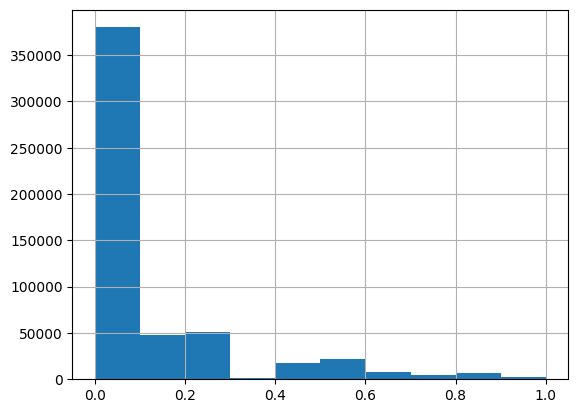

In [14]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [15]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [16]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [17]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 1
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [28]:
model = GradientBoostingRegressor()
model.fit(X_train_counts, y_train)

train_predictions = model.predict(X_train_counts)
mse_train = mean_squared_error(y_train, train_predictions)

test_predictions = model.predict(X_test_counts)
mse_test = mean_squared_error(y_test, test_predictions)

print(f"MSE en conjunto de entrenamiento: {mse_train}")
print(f"MSE en conjunto de prueba: {mse_test}")

MSE en conjunto de entrenamiento: 0.026657837963227887
MSE en conjunto de prueba: 0.027006981916012994


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [29]:
# Celda 2
vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3))
X_train_trigrams = vectorizer_trigrams.fit_transform(X_train)
X_test_trigrams = vectorizer_trigrams.transform(X_test)

model_trigrams = GradientBoostingRegressor()
model_trigrams.fit(X_train_trigrams, y_train)

train_predictions_trigrams = model_trigrams.predict(X_train_trigrams)
mse_train_trigrams = mean_squared_error(y_train, train_predictions_trigrams)

test_predictions_trigrams = model_trigrams.predict(X_test_trigrams)
mse_test_trigrams = mean_squared_error(y_test, test_predictions_trigrams)

print(f"MSE en conjunto de entrenamiento con trigramas: {mse_train_trigrams}")
print(f"MSE en conjunto de prueba con trigramas: {mse_test_trigrams}")

MSE en conjunto de entrenamiento con trigramas: 0.037619153794779044
MSE en conjunto de prueba con trigramas: 0.03802873738583279


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

## Celda 3
El TfidfVectorizer es una técnica de tokenización que se utiliza comúnmente en el procesamiento de texto para convertir colecciones de documentos de texto en representaciones numéricas que los modelos pueden utilizar. Su nombre proviene de "Term Frequency-Inverse Document Frequency". 

# Funcionamiento del TfidfVectorizer: 
**Frecuencia de Término (TF):**  Calcula la frecuencia con la que aparece cada palabra. Cuantas más veces aparezca una palabra, mayor será su peso TF. 

**Frecuencia Inversa de Documento (IDF):** Evalúa la importancia de una palabra. Las palabras que aparecen en muchos documentos tendrán un IDF más bajo, mientras que las palabras que aparecen en pocos documentos tendrán un IDF más alto. Esto se hace para dar más peso a las palabras raras que pueden ser más informativas. 

**Ponderación Tfidf:**  La ponderación final se calcula multiplicando la frecuencia de término (TF) por la frecuencia inversa de documento (IDF). Esto significa que las palabras que aparecen con frecuencia en un documento pero raramente en otros tendrán una puntuación alta, lo que las hace más relevantes para ese documento específico. 

# Ventajas del TfidfVectorizer: 

- **Considera la importancia de las palabras:**  TfidfVectorizer no solo cuenta la frecuencia de las palabras, sino que también considera la importancia relativa de cada palabra en todo el corpus. 

- **Manejo de palabras comunes:**  TfidfVectorizer penaliza las palabras que aparecen en muchos documentos (como "el", "de", etc.) al darles un bajo peso IDF, lo que ayuda a centrarse en palabras más informativas. 

# Desventajas del TfidfVectorizer: 

- **Menos efectivo para texto corto:**  En comparación con CountVectorizer, TfidfVectorizer puede ser menos efectivo para textos muy cortos donde la frecuencia de términos puede ser más importante que la frecuencia inversa de documento. 

- **Requiere más recursos computacionales:**  Debido a que calcula el IDF para todo el corpus, puede requerir más recursos computacionales en comparación con CountVectorizer. 

**TfidfVectorizer** es una técnica más sofisticada que CountVectorizer al considerar la importancia relativa de las palabras en un corpus de documentos, pero puede tener un rendimiento diferente dependiendo del tipo de texto y la aplicación específica.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [30]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model_tfidf = GradientBoostingRegressor()
model_tfidf.fit(X_train_tfidf, y_train)

train_predictions_tfidf = model_tfidf.predict(X_train_tfidf)
mse_train_tfidf = mean_squared_error(y_train, train_predictions_tfidf)

test_predictions_tfidf = model_tfidf.predict(X_test_tfidf)
mse_test_tfidf = mean_squared_error(y_test, test_predictions_tfidf)

print(f"MSE en conjunto de entrenamiento con TfidfVectorizer: {mse_train_tfidf}")
print(f"MSE en conjunto de prueba con TfidfVectorizer: {mse_test_tfidf}")


MSE en conjunto de entrenamiento con TfidfVectorizer: 0.026380219811188474
MSE en conjunto de prueba con TfidfVectorizer: 0.026791280179106005


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

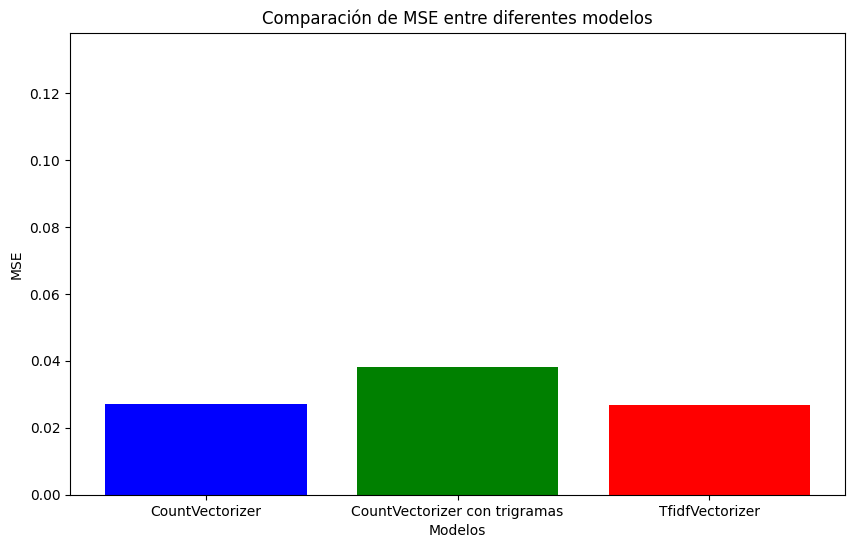

In [31]:
# Celda 5
import matplotlib.pyplot as plt

# MSE de CountVectorizer
mse_count = [mse_test, mse_test_trigrams, mse_test_tfidf]  # Usamos el mismo MSE de CountVectorizer para hacer la comparación
labels = ['CountVectorizer', 'CountVectorizer con trigramas', 'TfidfVectorizer']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, mse_count, color=['blue', 'green', 'red'])
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre diferentes modelos')
plt.ylim(0, max(mse_count) + 0.1)
plt.show()



El preprocesamiento de texto, a través de técnicas como CountVectorizer, CountVectorizer con trigramas y TfidfVectorizer, puede tener un impacto significativo en el desempeño de los modelos de aprendizaje automático. 

**Representación de las palabras:**  CountVectorizer y CountVectorizer con trigramas representan las palabras en función de su frecuencia en los documentos, mientras que TfidfVectorizer tiene en cuenta la importancia relativa de las palabras. Esto significa que TfidfVectorizer puede dar más peso a las palabras más informativas y menos peso a las palabras comunes. 

**Manejo de palabras frecuentes:**  TfidfVectorizer penaliza las palabras que aparecen mucho, como artículos y preposiciones, al darles un bajo peso IDF, lo que puede ser beneficioso para enfocarse en palabras más informativas. En contraste, CountVectorizer no distingue entre palabras frecuentes y poco frecuentes en términos de importancia. 

**Modelo y métricas:**  El tipo de modelo utilizado y la métrica de evaluación también pueden influir en cómo el preprocesamiento afecta el desempeño. Por ejemplo, un modelo de regresión lineal puede tener resultados diferentes al usar diferentes técnicas de tokenización. 

**Complejidad de los datos:**  Dependiendo de la complejidad y la naturaleza de los datos de texto, ciertas técnicas de preprocesamiento pueden ser más efectivas que otras. Por ejemplo, TfidfVectorizer puede ser más adecuado para datos con un vocabulario variado, mientras que CountVectorizer puede ser suficiente para textos más simples. 